# **Using Physical Attributes and Point Percentages to Predict Position for NBA Players**

##### *Tanisha Amrin, Charmaine Chui, Jakob Sereda, Julian Wright*

## **Introduction**

One of the most popular sports in North America and worldwide (*SportsPro Media*, 2023), basketball has been played by millions, both professional and amateur, since its invention in 1891 (*National Geographic*, 2021). When it comes to professional basketball, all eyes are on the National Basketball Association (or NBA), considered to be the premier professional basketball league in the world (*SportsPro Media*, 2023). 

A key aspect of basketball are the positions of the players. The nuances of these roles can have a profound impact on a team's ability to perform, allowing individual players to show their unique talents if placed in the right role (*RedBull*, 2022). Our goal is to produce a data-driven tool to help categorize players into a position that best suits their body type and skillset.

The question we seek to answer is: **What position is an NBA player most likely to play, given their height, weight, free-throw percentage, and field goal percentage?** To answer this, we will train a model that predicts player position based on the specified predictors using the **k-nn** algorithm.

The data set we will use to answer this question was pulled from [*nba.com*](https://www.nba.com/stats/players), the official website of the NBA (*NBA API Client Package, see bibliography*). It contains stats on individual players during each NBA season. There are 58 columns and 4,917 rows in this data set, missing values are represented by "NA". 

## **Methods**

We began by importing several libraries necessary to our analysis.

In [9]:
# importing libraries 
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(cowplot)
library(grid)
library(gridExtra)

#### **Importing the Data**

Then, we used `read_csv` to read the data from the web.

In [10]:
# reading in the data from the web
nba_data <- read_csv("https://raw.githubusercontent.com/jakobsereda/dsci-100-project/main/data/stats.csv", show_col_types = FALSE) 
nba_data

PERSON_ID,FIRST_NAME,LAST_NAME,DISPLAY_FIRST_LAST,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FI_LAST,PLAYER_SLUG,BIRTHDATE,SCHOOL,COUNTRY,⋯,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76001,Alaa,Abdelnaby,Alaa Abdelnaby,"Abdelnaby, Alaa",A. Abdelnaby,alaa-abdelnaby,1968-06-24,Duke,USA,⋯,0.571,37,77,114,13,15,12,45,104,256
76002,Zaid,Abdul-Aziz,Zaid Abdul-Aziz,"Abdul-Aziz, Zaid",Z. Abdul-Aziz,zaid-abdul-aziz,1946-04-07,Iowa State,USA,⋯,0.739,19,31,50,10,3,3,11,29,63
76003,Kareem,Abdul-Jabbar,Kareem Abdul-Jabbar,"Abdul-Jabbar, Kareem",K. Abdul-Jabbar,kareem-abdul-jabbar,1947-04-16,UCLA,USA,⋯,0.739,103,231,334,74,38,85,95,196,748
51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,"Abdul-Rauf, Mahmoud",M. Abdul-Rauf,mahmoud-abdul-rauf,1969-03-09,Louisiana State,USA,⋯,0.759,5,20,25,76,9,1,26,50,266
1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,"Abdul-Wahad, Tariq",T. Abdul-Wahad,tariq-abdul-wahad,1974-11-03,San Jose State,France,⋯,0.500,14,26,40,21,6,3,7,26,57
949,Shareef,Abdur-Rahim,Shareef Abdur-Rahim,"Abdur-Rahim, Shareef",S. Abdur-Rahim,shareef-abdur-rahim,1976-12-11,California,USA,⋯,1.000,6,4,10,4,1,0,1,9,10
76005,Tom,Abernethy,Tom Abernethy,"Abernethy, Tom",T. Abernethy,tom-abernethy,1954-05-06,Indiana,USA,⋯,0.591,20,28,48,19,7,3,8,34,63
76006,Forest,Able,Forest Able,"Able, Forest",F. Able,forest-able,1932-07-27,Western Kentucky,USA,⋯,NA,NA,NA,1,1,NA,NA,NA,1,0
76007,John,Abramovic,John Abramovic,"Abramovic, John",J. Abramovic,john-abramovic,1919-02-09,Salem,USA,⋯,0.571,NA,NA,NA,2,NA,NA,NA,10,6


***Figure 1:** raw data imported from nba.com*

We then had our raw data imported from [*nba.com*](https://www.nba.com/stats/players). But, as can be seen above, it was quite unwieldy in its raw form. To remedy this, we decided to clean and wrangle the data into a **tidy** format, before continuing our analysis.

#### **Cleaning and Wrangling the Data**

First, we changed the column headers to be all lowercase using `tolower`. Then, we used `select` to isolate for columns that included unique and relevant data, as many columns included repeated information (each player's name was included in multiple columns, for example). Lastly, we used `mutate` to alter the data such that each player was categorized only by their primary position. In the data, some players are categorized as having two positions, seperated by a hyphen (i.e. Center-Forward, Gaurd-Forward). In cases such as these, the *primary position* of such a player is given by the position *before* the hyphen.

In [3]:
# cleaning and wrangling the data
names(nba_data) <- tolower(names(nba_data))

nba_clean <- nba_data |>
    select(person_id, first_name, last_name, height, weight, position, season_id, 
           gp, gs, min, fg_pct, fg3_pct, ft_pct, reb, ast, stl, blk, tov, pf, pts) |>
    na.omit() |>
    mutate(position = ifelse(position == "Center-Forward", "Center", position)) |>
    mutate(position = ifelse(position == "Guard-Forward", "Guard", position)) |>
    mutate(position = ifelse(position == "Forward-Guard" | position == "Forward-Center", "Forward", position)) |>
    mutate(position = as_factor(position))

nba_clean

person_id,first_name,last_name,height,weight,position,season_id,gp,gs,min,fg_pct,fg3_pct,ft_pct,reb,ast,stl,blk,tov,pf,pts
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76001,Alaa,Abdelnaby,82,240,Forward,1994-95,54,0,506,0.511,0.000,0.571,114,13,15,12,45,104,256
76003,Kareem,Abdul-Jabbar,86,225,Center,1988-89,74,74,1695,0.475,0.000,0.739,334,74,38,85,95,196,748
51,Mahmoud,Abdul-Rauf,73,162,Guard,2000-01,41,0,485,0.488,0.286,0.759,25,76,9,1,26,50,266
1505,Tariq,Abdul-Wahad,78,235,Forward,2002-03,14,0,204,0.466,0.000,0.500,40,21,6,3,7,26,57
949,Shareef,Abdur-Rahim,81,245,Forward,2007-08,6,0,51,0.214,0.000,1.000,10,4,1,0,1,9,10
76005,Tom,Abernethy,79,220,Forward,1980-81,39,0,298,0.424,0.000,0.591,48,19,7,3,8,34,63
203518,Alex,Abrines,78,200,Guard,2018-19,31,2,588,0.357,0.323,0.923,48,20,17,6,14,53,165
1630173,Precious,Achiuwa,80,243,Forward,2023-24,56,17,1276,0.499,0.271,0.618,373,78,38,52,63,107,468
101165,Alex,Acker,77,185,Guard,2008-09,25,0,200,0.395,0.350,0.500,24,12,5,4,7,9,72


***Figure 2:** tidy NBA data*

After performing the specified cleaning and wrangling (as can be observed in the dataframe above), the data was **tidy** and ready for analysis.

#### **Splitting the Data**

Before starting work on our classifier, we divided our data set into training and testing sets using `initial_split`. Since we will are predicting player **position**, we stratified by it. We decided to split our data 75% training to 25% testing, since it gives us a large amount of data to prepare and train our model off of, but still a reasonable amount to test with afterwards (a quarter of the full data set).

In [11]:
set.seed(2024) 

# splitting the data into training and testing sets
nba_split <- initial_split(nba_clean, prop = 3/4, strata = position)

nba_train <- training(nba_split)
nba_test <- testing(nba_split)

head(nba_train)

person_id,first_name,last_name,height,weight,position,season_id,gp,gs,min,fg_pct,fg3_pct,ft_pct,reb,ast,stl,blk,tov,pf,pts
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
76003,Kareem,Abdul-Jabbar,86,225,Center,1988-89,74,74,1695,0.475,0.000,0.739,334,74,38,85,95,196,748
201582,Alexis,Ajinca,86,248,Center,2016-17,39,15,584,0.500,0.000,0.725,177,12,20,22,31,77,207
202374,Solomon,Alabi,85,252,Center,2011-12,14,0,122,0.361,0.000,0.875,47,3,2,9,5,11,33
202332,Cole,Aldrich,83,253,Center,2017-18,21,0,49,0.333,0.000,0.333,15,3,2,1,1,11,12
200746,LaMarcus,Aldridge,83,250,Center,2021-22,47,12,1050,0.550,0.304,0.873,258,42,14,47,44,78,607
76021,Chuck,Aleksinas,83,260,Center,1984-85,74,4,1114,0.478,0.000,0.733,270,36,15,15,72,171,377


***Figure 3:** head of NBA data training set*

In [12]:
tibble(training_rows = nrow(nba_train), testing_rows = nrow(nba_test))

training_rows,testing_rows
<int>,<int>
2514,840


***Figure 4:** number of rows in NBA data testing and training sets*

We produced a training set with 2514 rows, plenty to train our model on, and a testing set with 840 rows, a very healthy amount for testing. Moving forward in our analysis, we will not use or alter the testing set until the very end, when we will test our models performance.

#### **Summarizing the Data**

Next, to summarize the relavant information in our training data, we created a table provided below. We used `group_by` to group the data set by **position**, and then calculated the minimums, maximums, and means for each relevant predictor (**height**, **weight**, **fg_pct**, and **ft_pct**) using `summarize`.

In [5]:
# summarizing the number of players in each position, and the min, max, and mean of each predictor for each position
nba_summarized <- nba_train |>
    group_by(position) |>
    summarize(min_height = min(height), max_height = max(height), mean_height = mean(height),
              min_weight = min(weight), max_weight = max(weight), mean_weight = mean(weight),
              min_fg_pct = min(fg_pct), max_fg_pct = max(fg_pct), mean_fg_pct = mean(fg_pct),
              min_ft_pct = min(ft_pct), max_ft_pct = max(ft_pct), mean_ft_pct = mean(ft_pct),
              n_players = n())

nba_summarized

position,min_height,max_height,mean_height,min_weight,max_weight,mean_weight,min_fg_pct,max_fg_pct,mean_fg_pct,min_ft_pct,max_ft_pct,mean_ft_pct,n_players
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Forward,71,86,80.11799,153,289,226.2340,0,1,0.4092183,0,1,0.6031200,1017
Center,79,91,83.36118,195,360,250.5577,0,1,0.4317838,0,1,0.5567199,407
Guard,65,84,75.56789,133,255,194.8569,0,1,0.3732541,0,1,0.6561018,1090


The first thing we noticed through this summary is that there are significantly less Centers than Forwards and Guards in the training set. We contemplated the idea of upsampling the data for Centers, to account for this discrepenacy, but upon testing the idea we found that our model's accuracy dropped significantly. We realized that since less players are Centers overall, *not* upsampling the data bakes this behaviour into our model, since there are less Centers in the training data.

We also noticed clear distinctions between the positions based on their minimums, maximums, and means for each predictor. For example, looking at the means for **height** and **weight** we see that for these predictors Centers have a higher average, Guards have a lower average, and Forwards split the difference. To further illustrate these differences, we then created exploratory visualizations of the training set.

#### **Visualizing the Data**

We decided to present the data in the training set through multiple faceted histograms, showing the population distribution for each predictor, seperated by **position**. To plot the population distributions, we first created multiple histogram plots, one for each predictor, that were faceted by row for each **position** using `ggplot` with `geom_histogram` and `facet_grid`. We then plotted them in a grid, but removed the legend and y-axis title for some plots to make the grid more compact. We had to extract the legend from two of the plots to render them separately in a new column, so that the plots were equally sized.

In [7]:
options(repr.plot.width = 10, repr.plot.height = 10)

# plotting the distributions of all predictors for each position (using training data)
nba_plot_height <- nba_train |>
    ggplot(aes(x = height, fill = position)) +
        geom_histogram(binwidth = 1) +
        facet_grid(rows = vars(position)) +
        labs(x = "Player Height (in Inches)", y = "Number of Players", 
             fill = "Primary Position of Player", title = "Players by Height") +
        guides(fill="none") +
        scale_fill_brewer(palette = 'Set1')

nba_plot_weight <- nba_train |>
    ggplot(aes(x = weight, fill = position)) +
        geom_histogram(binwidth = 5) +
        facet_grid(rows = vars(position)) +
        labs(x = "Player Weight (in Pounds)", y = "Number of Players", 
             fill = "Primary Position of Player", title = "Players by Weight") +
        theme(axis.title.y = element_blank()) +
        scale_fill_brewer(palette = 'Set1')

nba_plot_fg_pct <- nba_train |>
    ggplot(aes(x = fg_pct, fill = position)) +
        geom_histogram(binwidth = 0.025) +
        facet_grid(rows = vars(position)) +
        labs(x = "Player Field Goal Percentage (Made / Attempted)", y = "Number of Players", 
             fill = "Primary Position of Player", title = "Players by Field Goal Percentage") +
        guides(fill = "none") +
        scale_fill_brewer(palette = 'Set1')

nba_plot_ft_pct <- nba_train |>
    ggplot(aes(x = ft_pct, fill = position)) +
        geom_histogram(binwidth = 0.025) +
        facet_grid(rows = vars(position)) +
        labs(x = "Player Free Throw Percentage (Made / Attempted)", y = "Number of Players", 
             fill = "Primary Position of Player", title = "Players by Free Throw Percentage") +
        theme(axis.title.y = element_blank()) +
        scale_fill_brewer(palette = 'Set1')

# https://stackoverflow.com/questions/12539348/ggplot-separate-legend-and-plot
g_legend<-function(a.gplot){
    tmp <- ggplot_gtable(ggplot_build(a.gplot))
    leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
    legend <- tmp$grobs[[leg]]
    legend
}

legend1 <- g_legend(nba_plot_weight)
legend2 <- g_legend(nba_plot_ft_pct)

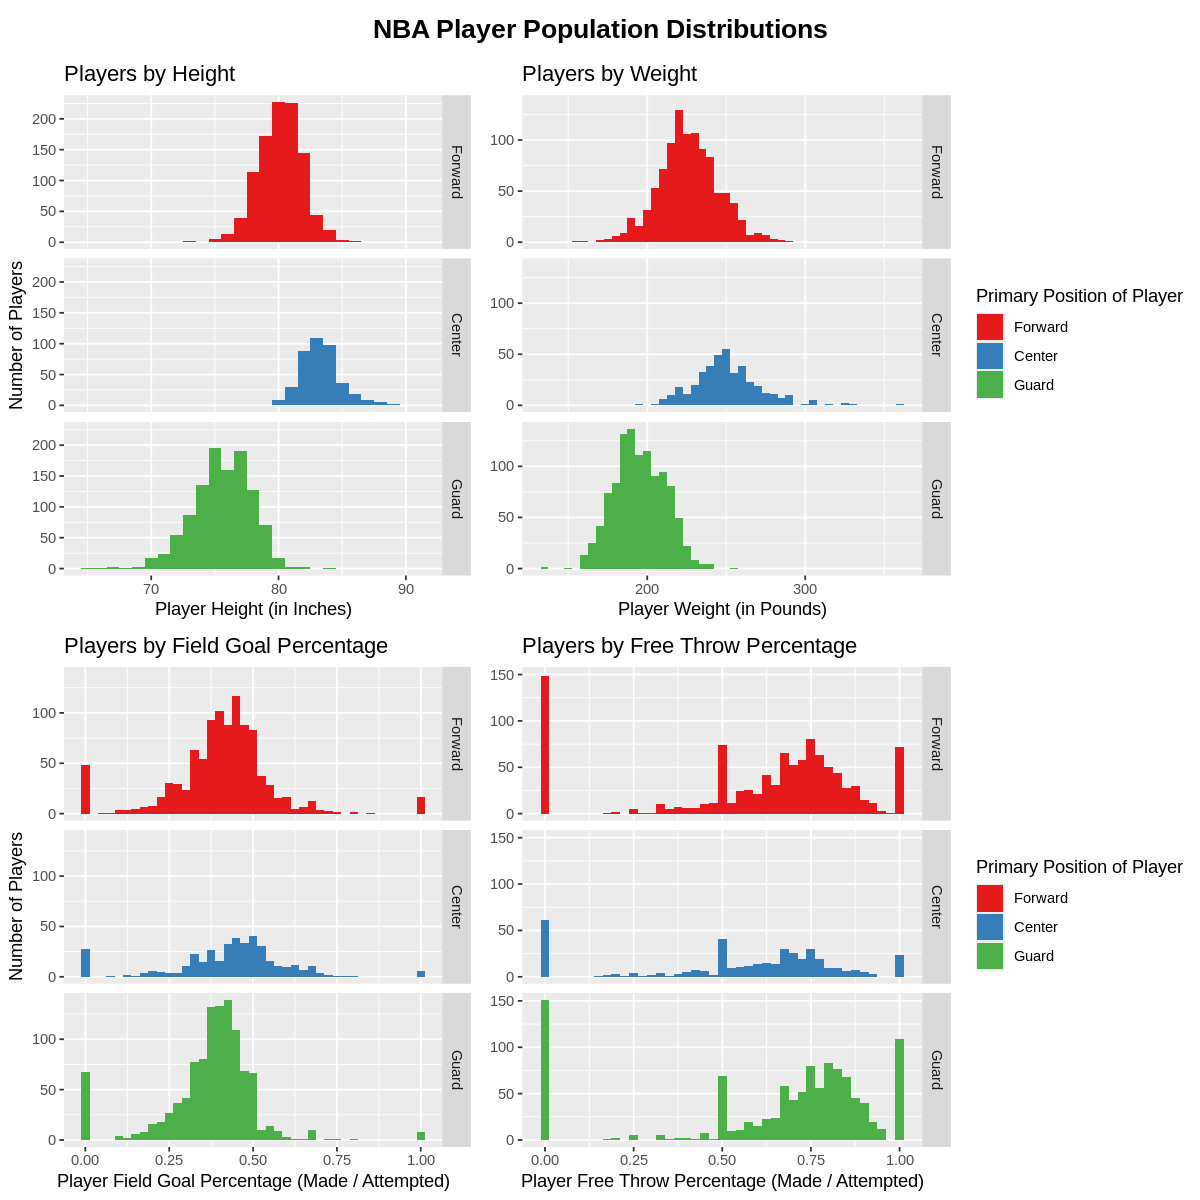

In [8]:
# creating a grid to combine the 4 previously created histograms
plot_grid(
    textGrob("NBA Player Population Distributions", gp=gpar(fontface="bold", fontsize=16)),
    plot_grid(
        nba_plot_height, nba_plot_weight + theme(legend.position = 'none'), legend1,
        nba_plot_fg_pct, nba_plot_ft_pct + theme(legend.position = 'none'), legend2,
        ncol = 3,
        rel_widths = c(1, 1, 0.5)
    ),
    ncol = 1,
    rel_heights = c(0.05, 1)
)

Looking at the above visualization, we observed different curves for both **height** and **weight** depending on **position**, confirming that they are good predictors. Additionally, we recognized some very slight, and surprisingly small differences for both **fg_pct** and **ft_pct**.

#### **Creating the Model: *Choosing K***

In [8]:
set.seed(2024)

# creating recipe and standardizing data
nba_recipe <- recipe(position ~ height + weight + fg_pct + ft_pct, data = nba_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# creating knn-model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# perform 5 fold cross validation
nba_vfold <- vfold_cv(nba_train, v = 5, strata = position)
gridvals <- tibble(neighbors = c(1:20))

# creating workflow
knn_results <- workflow() |>
    add_recipe(nba_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = nba_vfold, grid = gridvals) |>
    collect_metrics()

knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7669101,5,0.005924267,Preprocessor1_Model01
1,roc_auc,hand_till,0.8076625,5,0.005675290,Preprocessor1_Model01
2,accuracy,multiclass,0.7661149,5,0.005513226,Preprocessor1_Model02
2,roc_auc,hand_till,0.8645209,5,0.006801193,Preprocessor1_Model02
3,accuracy,multiclass,0.7955432,5,0.010610142,Preprocessor1_Model03
3,roc_auc,hand_till,0.8820122,5,0.010628061,Preprocessor1_Model03
4,accuracy,multiclass,0.7963400,5,0.010994141,Preprocessor1_Model04
4,roc_auc,hand_till,0.8953007,5,0.011577147,Preprocessor1_Model04
5,accuracy,multiclass,0.8074828,5,0.012942764,Preprocessor1_Model05


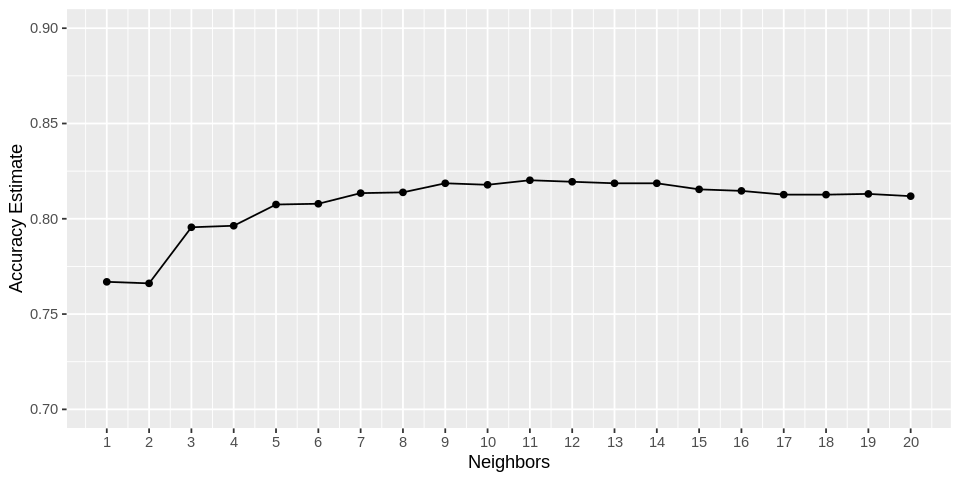

In [9]:
options(repr.plot.width = 8, repr.plot.height = 4)

# filtering for accuracies
accuracies <- knn_results |>
    filter(.metric == "accuracy")

# creating a plot of accuracy vs. k
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 20, by = 1)) +  # adjusting the x-axis
    scale_y_continuous(limits = c(0.7, 0.9)) # adjusting the y-axis

accuracy_versus_k

In [10]:
# pulling the most accurate k value
best_k <- accuracies |>
    filter(mean == max(mean)) |>
    select(neighbors) |>
    pull()

#### **Creating the Model: *Final Model***

In [11]:
set.seed(2024)

# creating a new model spec using best k value
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

# creating workflow
nba_fit <- workflow() |>
    add_recipe(nba_recipe) |>
    add_model(knn_spec) |>
    fit(data = nba_train)

nba_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11L,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1821798
Best kernel: rectangular
Best k: 11

#### **Testing the Model: *Summarizing Results***

In [12]:
nba_predictions <- predict(nba_fit, nba_test) |>
    bind_cols(nba_test)

nba_metrics <- nba_predictions |>
    metrics(truth = position, estimate = .pred_class) |>
    filter(.metric == "accuracy")

nba_conf_mat <- nba_predictions |>
    conf_mat(truth = position, estimate = .pred_class)

nba_metrics
nba_conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8202381


          Truth
Prediction Forward Center Guard
   Forward     275     47    39
   Center       19     89     0
   Guard        46      0   325

#### **Testing the Model: *Visualizing Results***

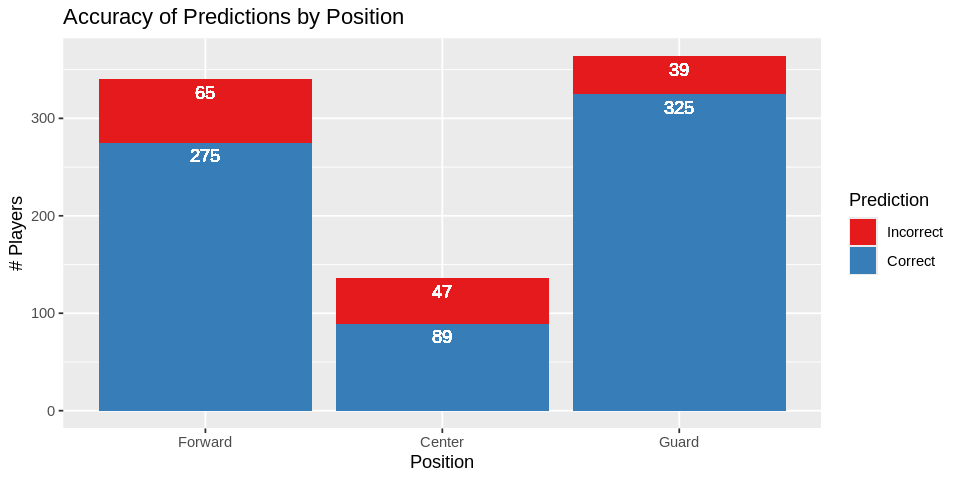

In [13]:
# of actual position, first element guessed as forward, second guessed center, third/last guessed guard
forward_conf <- nba_conf_mat[[1]][1:3]
center_conf <- nba_conf_mat[[1]][4:6]
guard_conf <- nba_conf_mat[[1]][7:9]

correct <- tibble(Forward = c(forward_conf[1], sum(forward_conf[2:3])),
                  Center  = c(center_conf[2], center_conf[1] + center_conf[3]),
                  Guard   = c(guard_conf[3], sum(guard_conf[1:2])))

nba_predictions <- nba_predictions |>
  group_by(position) |>
  mutate(label_y = ifelse(.pred_class == position,
                          correct[position][[1]][1],
                          sum(correct[position][[1]])),
         label   = ifelse(.pred_class == position,
                          correct[position][[1]][1],
                          correct[position][[1]][2]))

pred_plot <- nba_predictions |>
    ggplot(aes(x = position, fill = .pred_class == position)) +
    geom_bar() +
    geom_text(aes(y = label_y, label = label), vjust = 1.5, colour = "white") +
    scale_fill_brewer(palette = 'Set1', name = "Prediction", labels = c("Incorrect", "Correct")) +
    labs(x = "Position", y = "# Players", title = "Accuracy of Predictions by Position")
pred_plot

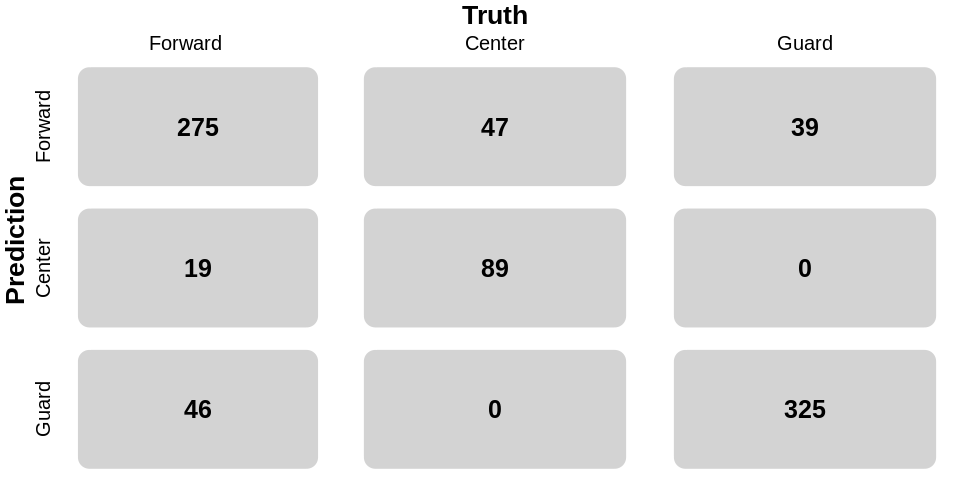

In [14]:
# https://stackoverflow.com/a/45474093
pl = lapply(1:9, function(i) {
    p = grobTree(roundrectGrob(gp = gpar(fill="lightgray", col="white"),
                               width = unit(0.85,"npc"),
                               height = unit(0.85,"npc")),
                 textGrob(nba_conf_mat[[1]][i],
                          gp = gpar(fontsize = 15,
                                    col = "black",
                                    fontface = "bold")))
})

# Create row and column titles
titles <- c("Forward", "Center", "Guard")
col.titles = titles
row.titles = titles

# Add row titles
pl[1:3] = lapply(1:3, function(i) arrangeGrob(pl[[i]], left=row.titles[i]))

# Add column titles and lay out plots
grid.arrange(grobs = lapply(c(1,4,7),
    function(i) {
        arrangeGrob(grobs = pl[i:(i+2)],
            top = col.titles[i/3 + 1],
            ncol = 1
        )
    }),
    ncol = 3,
    top = textGrob("Truth", gp=gpar(fontsize=16, fontface="bold")),
    left = textGrob("Prediction", gp=gpar(fontsize=16, fontface="bold"), rot=90)
)

## **Bibliography**

- Data is pulled from [*nba.com*](https://www.nba.com/stats/players), the official website of the NBA, 
   using the NBA API Client package; [*github.com/swar/nba_api*](https://github.com/swar/nba_api) (Swar Patel, Randall Forbes, et al). 
- McMurray, Ben. "Why the NBA is America's Most Globally Relevant Sports Property." *SportsPro Media*, 24 Oct. 2023, [*link*](https://www.sportspromedia.com/insights/analysis/nba-tv-rights-revenue-global-popularity-data-ampere-analysis/).
- Toole, T.C. "Here's the History of Basketball - From Peach Baskets in Springfield to Global Phenomenon." *National Geographic*, 27 Mar. 2021, [*link*](https://www.nationalgeographic.com/history/article/basketball-only-major-sport-invented-united-states-how-it-was-created).
- Lister, Aimee. "Basketball Positions Explained: What Each Player Does." *RedBull*, 21 Jul. 2022, [*link*](https://www.redbull.com/us-en/basketball-positions-what-each-player-does#:~:text=Generally%20speaking%2C%20each%20team%20is,handling%2C%20passing%20and%20shooting%20skills.).